In [187]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [188]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [189]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [190]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [191]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [192]:
from pprint import pprint
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
 
'''
- pprint: Pretty Printer, formats output in a more readable way
- pandas: A library for data manipulation and analysis
- numpy: A library for numerical operations, especially for working w/ arrays/ matrices
- matplotlib.pyplot: A plotting library for creating static/animated/interactive visualizations
- seaborn: A statistical data visualization library based on matplotlib, providing a high-level interface for creating attractive/informative statistical graphics
'''

'\n- pprint: Pretty Printer, formats output in a more readable way\n- pandas: A library for data manipulation and analysis\n- numpy: A library for numerical operations, especially for working w/ arrays/ matrices\n- matplotlib.pyplot: A plotting library for creating static/animated/interactive visualizations\n- seaborn: A statistical data visualization library based on matplotlib, providing a high-level interface for creating attractive/informative statistical graphics\n'

In [193]:
import praw
from dotenv import load_dotenv
import os

def configure():
    load_dotenv()

# load_dotenv() load environment variables from .env file
# os.getenv() access the variables

reddit = praw.Reddit(
    client_id=os.getenv('client_id'),
    client_secret=os.getenv('client_secret'),
    user_agent="hurricanescript by u/No_Second_754",
)

In [226]:
# Creating keyword list with quoted phrases for exact match 
keyword_list = ["\"hurricane recovery\"", "\"hurricane damage\"", "\"storm surge\"",  "\"hurricane maria\"",  "\"coral reef\"", "\"coral reefs\"", "\"coral bleaching\""]

# search query string with "OR" operator
search_query = " OR ".join(keyword_list)

# Print the search query for debugging
# print(f"Searching for: {search_query}")

# creating dataframe for displaying scraped data
df = pd.DataFrame()

# creating lists for storing scraped data
titles=[] # post title
dates=[] # timestamp
scores=[] # upvotes/comment counts
comments=[] # keywords or phrases
links=[] # links to post

# looping over posts and scraping it
for submission in reddit.subreddit("all").search(search_query, limit=None):
    print(submission.title)
    print(submission.created_utc)
    print(submission.score)
    print(submission.num_comments)
    print(submission.url)

# Append data to lists
    titles.append(submission.title)
    dates.append(datetime.fromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S'))
    scores.append(submission.score)
    comments.append(submission.num_comments)
    links.append(submission.url)

# Store lists in the DataFrame
df['Title'] = titles
df['Dates'] = dates
df['Comments'] = comments
df['Upvotes'] = scores #upvotes
df['Links'] = links #urls

print(df.shape) # Print the shape of the merged DataFrame

df.head(25) # Print the first 10 rows of the merged DataFrame

df.to_csv('headlines.csv', header=True, encoding='utf-8', index=False)


The storm surge for Hurricane Milton is expected to be 15 feet. To give you an idea of how deadly this is, here's what 9 feet looks like:
1728457955.0
28663
1117
https://v.redd.it/a9wvqvswkotd1
This is what a 15 foot hurricane storm surge looks like. It's terrifying.
1728514966.0
31401
1036
https://v.redd.it/7mrig5pbattd1
Milton strengthens into Category 4 hurricane, triggers storm surge warnings for Florida's Gulf Coast
1728307792.0
14373
1257
https://www.nbcnews.com/news/weather/hurricane-milton-strengthens-major-storm-florida-rcna174229
by Ron DeSantis to stage a hurricane recovery press conference by stacking actual garbage behind his podium, all while shaming other politicians for exploiting the disaster
1728870136.0
22569
620
https://v.redd.it/hmztrx7jmmud1
This is what a 15 foot hurricane storm surge looks like. It's terrifying. 
1728515261.0
15382
368
https://v.redd.it/68igmys7bttd1
The graphics guy creates live simulation to help the weather reporter explain storm surge
171501

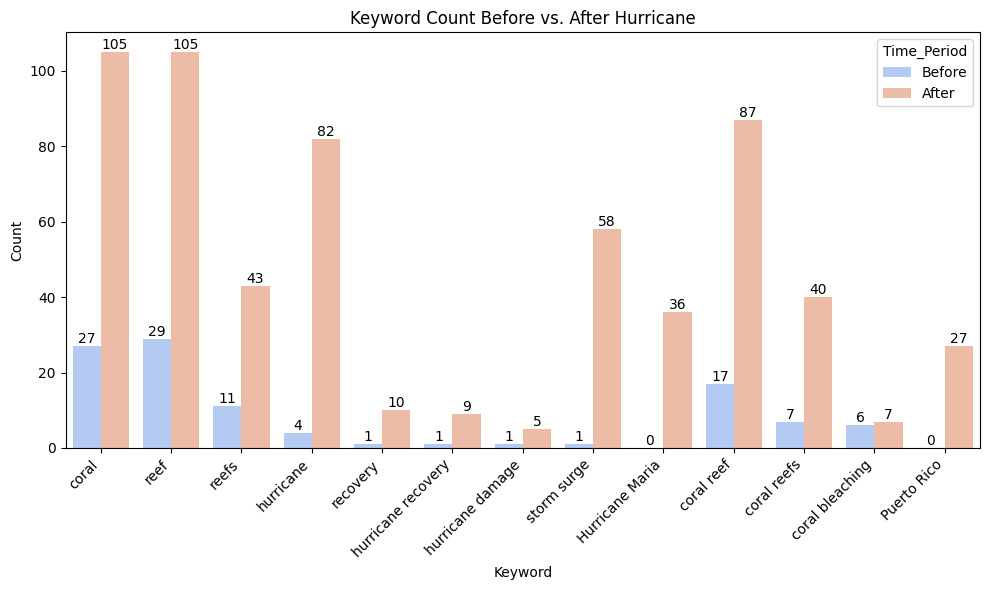

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the hurricane date
hurricane_date = pd.to_datetime('2017-09-17') # convert string to datetime obj to compare post dates to it

# Convert the 'Dates' column to datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Create a new column to classify posts as 'Before' or 'After' the hurricane
# apply lambda function to each element of the Dates column
# lambda function checks whether post date is before or after the hurricane_date
df['Time_Period'] = df['Dates'].apply(lambda x: 'Before' if x < hurricane_date else 'After')

# Define  keywords
keywords = ["coral", "reef", "reefs", "hurricane",  "recovery", "hurricane recovery", "hurricane damage", "storm surge", "Hurricane Maria", "coral reef", "coral reefs", "coral bleaching", "Puerto Rico"]

# Function to count keyword occurrences in a given text(title). Returns a dictionary + each keyword is a key
def count_keywords(text, keywords):
    count = {keyword: text.lower().count(keyword.lower()) for keyword in keywords}
    return count

# def count_keywords(title):
#     title = title.lower() 
#     for keyword in keywords:
#         if keyword in title:
#             return keyword
#         return "None"

# Initialize dictionaries to store keyword count
keyword_counts_before = {keyword: 0 for keyword in keywords} # store the count of each keyword for posts labeled "Before".
keyword_counts_after = {keyword: 0 for keyword in keywords} # store the count of each keyword for posts labeled "After".

# Loop over the rows and categorize keyword count
for index, row in df.iterrows(): # loops through the DataFrame by row; tells the index (row index) and row (the data of that row)
    # Get the title of the post
    title = row['Title']
    
    # Count the keywords in the title
    keyword_count = count_keywords(title, keywords)
    
    # Add the counts to before or after categories
    if row['Time_Period'] == 'Before':
        for keyword, count in keyword_count.items():
            keyword_counts_before[keyword] += count
    else:
        for keyword, count in keyword_count.items():
            keyword_counts_after[keyword] += count

# Prepare data for plotting
keyword_freq = pd.DataFrame({
    'Keyword': keywords,
    'Before': [keyword_counts_before[key] for key in keywords],
    'After': [keyword_counts_after[key] for key in keywords]
})

# Melt the DataFrame for easier plotting. Resahpes dataframe so each keyword appears in two rows—one for "Before" and one for "After."
keyword_freq_melted = keyword_freq.melt(id_vars='Keyword', value_vars=['Before', 'After'], var_name='Time_Period', value_name='Count')

# Plot the results
plt.figure(figsize=(10, 6)) # size of plot is 10in by 6in
ax = sns.barplot(x='Keyword', y='Count', hue='Time_Period', estimator="sum", errorbar=None, data=keyword_freq_melted, palette='coolwarm') # bar plot using seaborn. x-axis: keyword, y-axis is count of keywords
for container in ax.containers:
    ax.bar_label(container)

plt.title('Keyword Count Before vs. After Hurricane') # title
plt.xlabel('Keyword') 
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # rotate x-axis labels to stop overlap
plt.tight_layout() # adjust layout so labels aren't cut off
plt.show() # show plot

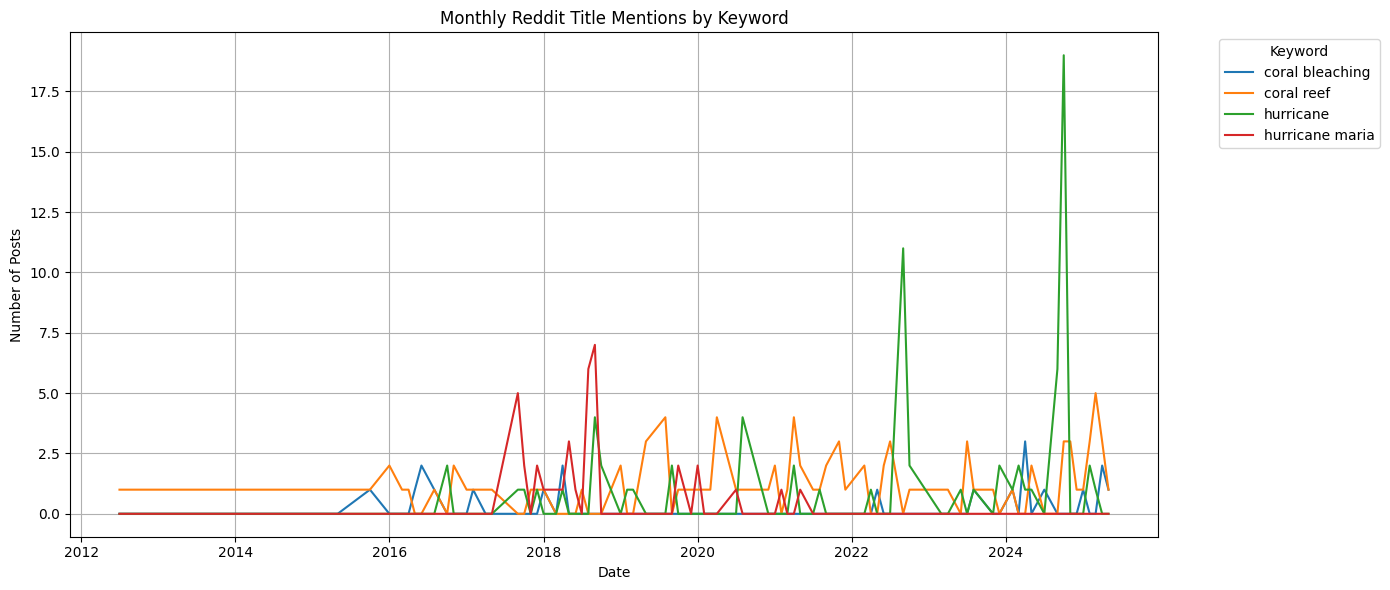

In [ ]:
keyword_map = {
    "coral bleaching": ["bleaching"],
    "coral reef": ["coral reef", "coral reefs", "reef", "reefs", "coral"],
    "hurricane maria": ["hurricane maria", "maria"],
    "hurricane": ["hurricane", "storm", "storm warning"],
    "Puerto Rico": ["puerto rico", "p.r."],
    "storm surge": ["storm surge", "coastal flooding"],
    "Chasing Coral": ["Chasing Coral"]
}

# Tag a Reddit post title w/ the correct keyword category
def tag_keyword(title):
    title = title.lower() # make lowercase for easier matching
    for label, terms in keyword_map.items(): # loop through each category & it's list of terms
        for term in terms:
            if term in title: # if any term is found in the title
                return label # return the category label
    return "None" # if no match is found, tag is "None"

# Apply the function to every title in the DataFrame
df["Keyword"] = df["Title"].fillna("").apply(tag_keyword)
df = df[df["Keyword"] != "None"]

df["Dates"] = pd.to_datetime(df["Dates"], errors="coerce")
df = df.dropna(subset=["Dates"])
df["Month"] = df["Dates"].dt.to_period("M")

monthly_counts = df.groupby(["Month", "Keyword"]).size().unstack(fill_value=0)
monthly_counts.index = monthly_counts.index.to_timestamp()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for keyword in monthly_counts.columns:
    plt.plot(monthly_counts.index, monthly_counts[keyword], label=keyword)

plt.title("Monthly Reddit Title Mentions by Keyword")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()
